In [77]:
import sklearn
from rdkit.Chem import PandasTools, Descriptors, MolFromSmiles
from pandas import DataFrame
from sklearn.model_selection import train_test_split

from sklearn import svm
import numpy as np
from sklearn.metrics import mean_squared_error

In [13]:
data_file = open("../data/gr_alpha.csv")
data_file.readline()
raw_data = [line.strip().split(",") for line in data_file]
mols = [(int(spls[0]),spls[2],float(spls[1])) for spls in raw_data]

Deskriptory

MaxAbsPartialCharge	MaxAbsEStateIndex	NumValenceElectrons	MaxPartialCharge	MinEStateIndex	MinAbsEStateIndex	NumRadicalElectrons	BalabanJ	BertzCT	Chi2n	...	EState_VSA7	EState_VSA8	EState_VSA9	VSA_EState9	NHOHCount	NOCount	NumAliphaticHeterocycles	NumAromaticCarbocycles	RingCount	MolLogP

In [52]:
desc_list = Descriptors.descList
# desc_list = [x for x in desc_list if x[0] in compute_descriptors]

data = DataFrame(mols, columns=["id","smi","ic50"])
data.set_index("id")

for desc_name, function in desc_list:
    values = []
    for smiles in data["smi"]:
        mol = MolFromSmiles(smiles)
        values.append(function(mol))
    data[desc_name] = values
data["pic50"] = data.ic50.apply(lambda x : -1.0 * np.log10(x / 1.0e9))

In [60]:
data["pic50"] = data.ic50.apply(lambda x : -1.0 * np.log10(x / 1.0e9))
columns = [x[0] for x in desc_list[:13]]
columns

['MaxAbsPartialCharge',
 'MaxAbsEStateIndex',
 'ExactMolWt',
 'MolWt',
 'MaxEStateIndex',
 'MinAbsPartialCharge',
 'NumValenceElectrons',
 'MinAbsEStateIndex',
 'NumRadicalElectrons',
 'MinPartialCharge',
 'HeavyAtomMolWt',
 'MaxPartialCharge',
 'MinEStateIndex']

In [61]:
train_data, test_data = train_test_split(data)
train_data[columns]

,MaxAbsPartialCharge,MaxAbsEStateIndex,ExactMolWt,MolWt,MaxEStateIndex,MinAbsPartialCharge,NumValenceElectrons,MinAbsEStateIndex,NumRadicalElectrons,MinPartialCharge,HeavyAtomMolWt,MaxPartialCharge,MinEStateIndex
1278,0.507687,9.789389,283.193614,283.415,9.789389,0.118001,112,0.030833,0,-0.507687,258.215,0.118001,-0.030833
732,0.507920,9.945935,461.202465,461.627,9.945935,0.136252,172,0.074399,0,-0.507920,430.379,0.136252,-0.074399
1277,0.492264,11.108437,643.352240,643.832,11.108437,0.242829,248,0.324874,0,-0.492264,598.472,0.242829,-0.348633
1240,0.507956,13.004792,834.434984,835.081,13.004792,0.271893,322,0.011979,0,-0.507956,772.585,0.271893,-3.285425
708,0.440162,12.242349,266.105528,266.300,12.242349,0.254921,100,0.156849,0,-0.440162,252.188,0.254921,-0.156849
90,0.507822,13.787088,421.132551,421.424,13.787088,0.339637,158,0.017324,0,-0.507822,401.264,0.339637,-0.610089
1164,0.507966,13.187657,331.124215,331.437,13.187657,0.264073,122,0.009303,0,-0.507966,310.269,0.264073,-3.648287
75,0.359252,4.813160,390.278347,390.575,4.813160,0.224380,154,0.550725,0,-0.359252,356.303,0.224380,0.550725
453,0.507966,9.327241,253.073893,253.257,9.327241,0.142859,94,0.232612,0,-0.507966,242.169,0.142859,0.232612
676,0.465417,13.287982,487.096869,487.965,13.287982,0.337422,172,0.019232,0,-0.465417,465.789,0.337422,-0.518005


In [80]:
{
        'C': [1, 10, 100, 1000]
        , 'epsilon': [0.0, 0.1, 0.2, 0.3, 0.4]
        , 'gamma': [1.0, 0.1, 0.01, 0.001]
        , 'kernel': ['rbf']
    }

model = svm.SVR(C=10, epsilon=0.2, gamma=0.1, kernel="rbf")
model.fit(train_data[columns], train_data["pic50"]) 

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

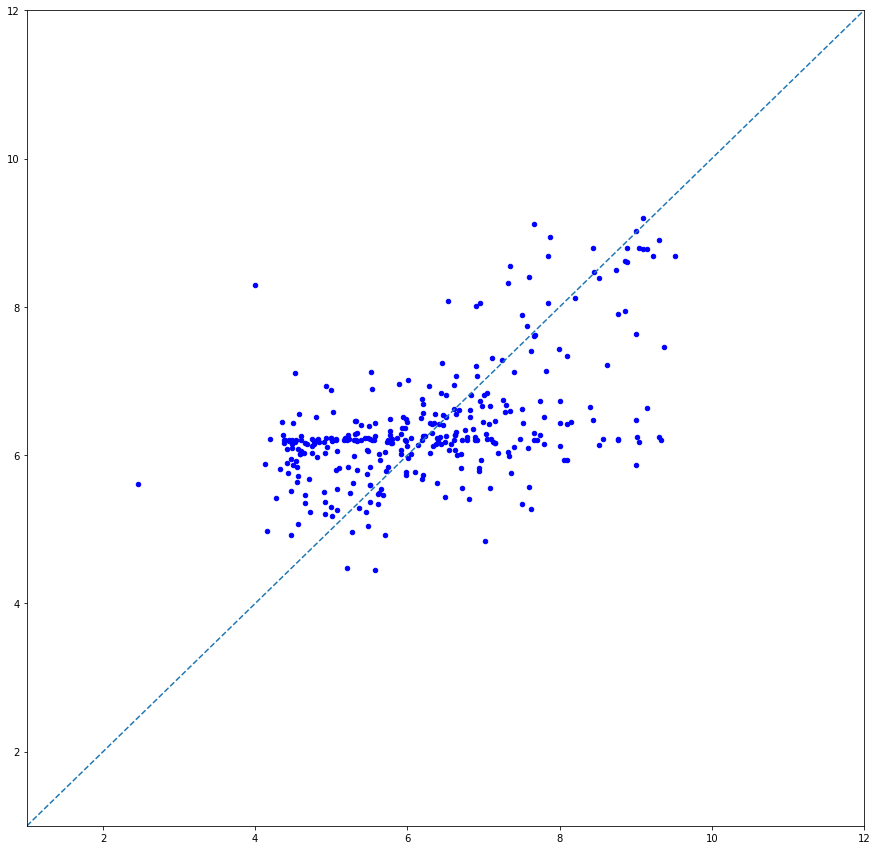

In [81]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15, 15]
span = (1,12)
axes = plt.gca()
axes.set_xlim(span)
axes.set_ylim(span)

plt.plot((span[0],span[1]), (span[0],span[1]), linestyle='--')

# plt.scatter(
#     pIC50_train
#     , model.predict(descriptors_train)
#     , c='green'
#     , s=20
# )

plt.scatter(
    test_data["pic50"]
    , model.predict(test_data[columns])
    , c='blue'
    , s=20
)
plt.show()

In [83]:
print("R^2: %0.2f" % model.score(test_data[columns], test_data.pic50))
print("R: %0.2f" % np.sqrt(model.score(test_data[columns], test_data.pic50)))
print("MSE: %0.2f" %  mean_squared_error(model.predict(test_data[columns]), test_data.pic50))

R^2: 0.30
R: 0.55
MSE: 1.29


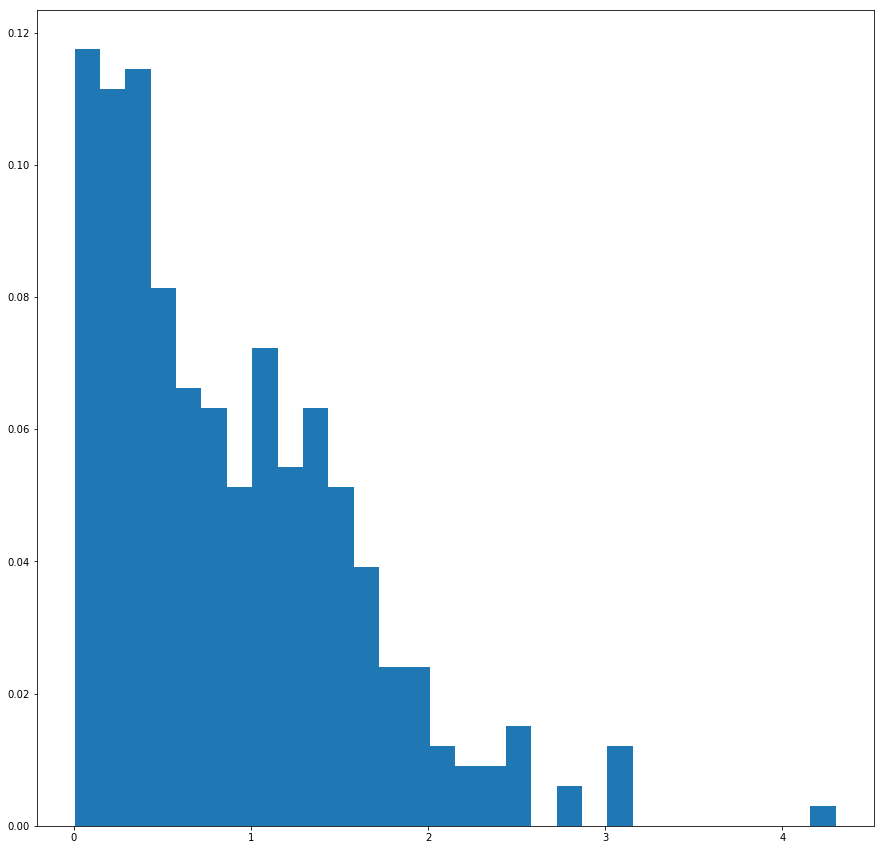

In [88]:
errors = (test_data.pic50 - model.predict(test_data[columns])).abs()
weights = np.ones_like(errors) / len(errors)
plt.hist(errors, weights=weights, bins=30)
plt.show()